## #TABLE WEBSITE_SESSIONS

In [ ]:
import pandas as pd

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/1xdSUObWQwSIx2EFhmJH2o9Otbu7ei4TghvvVcsmuLl0/edit?gid=125658187#gid=125658187'
spreadsheet_id = potter_url.split('/')[-2]
gid = potter_url.split('gid=')[-1].split('#')[0]
potter_csv_export_url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={gid}'
df_website_sessions = pd.read_csv(potter_csv_export_url)
df_website_sessions

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,3/19/12 8:04,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,2,3/19/12 8:16,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,3,3/19/12 8:26,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,4,3/19/12 8:37,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,5,3/19/12 9:00,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
...,...,...,...,...,...,...,...,...,...
472866,472867,3/19/15 7:49,394314,0,gsearch,brand,g_ad_2,desktop,https://www.gsearch.com
472867,472868,3/19/15 7:54,394315,0,bsearch,nonbrand,b_ad_1,mobile,https://www.bsearch.com
472868,472869,3/19/15 7:55,394316,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
472869,472870,3/19/15 7:56,394317,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com


In [ ]:
backup1=df_website_sessions.copy()

In [ ]:
df_website_sessions.head()

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,3/19/12 8:04,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,2,3/19/12 8:16,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,3,3/19/12 8:26,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,4,3/19/12 8:37,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,5,3/19/12 9:00,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


In [ ]:
df_website_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472871 entries, 0 to 472870
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   website_session_id  472871 non-null  int64 
 1   created_at          472871 non-null  object
 2   user_id             472871 non-null  int64 
 3   is_repeat_session   472871 non-null  int64 
 4   utm_source          389543 non-null  object
 5   utm_campaign        389543 non-null  object
 6   utm_content         389543 non-null  object
 7   device_type         472871 non-null  object
 8   http_referer        432954 non-null  object
dtypes: int64(3), object(6)
memory usage: 32.5+ MB


ada data yang bernilai Null dibeberapa column, diantaranya : 1. utm_source (389543 non Null) --> 83328 Null,
2. utm_campaign (389543 non Null) --> 83328 Null,
3. utm_content (389543 non Null) --> 83328 Null,
4. http_referer (432954 non Null) --> 39917 Null

CEK TIPE DATA

In [ ]:
df_website_sessions.dtypes

,0
website_session_id,int64
created_at,object
user_id,int64
is_repeat_session,int64
utm_source,object
utm_campaign,object
utm_content,object
device_type,object
http_referer,object


tipe data di column created_at perlu diubah dr object ke datetime

##CEK TYPO

In [ ]:
for column in df_website_sessions:
    print(df_website_sessions[column].value_counts())

website_session_id
472871    1
1         1
2         1
3         1
4         1
         ..
12        1
11        1
10        1
9         1
8         1
Name: count, Length: 472871, dtype: int64
created_at
11/28/14 9:39     14
11/28/14 12:08    13
11/29/13 13:00    13
11/29/13 12:45    13
11/28/14 15:31    12
                  ..
3/19/15 7:28       1
3/19/15 7:29       1
3/19/12 8:37       1
3/19/12 8:26       1
3/19/12 8:16       1
Name: count, Length: 367237, dtype: int64
user_id
96978     4
96977     4
322408    4
247449    4
254911    4
         ..
138157    1
138155    1
138153    1
138152    1
138166    1
Name: count, Length: 394318, dtype: int64
is_repeat_session
0    394318
1     78553
Name: count, dtype: int64
utm_source
gsearch       316035
bsearch        62823
socialbook     10685
Name: count, dtype: int64
utm_campaign
nonbrand            337615
brand                41243
desktop_targeted      5590
pilot                 5095
Name: count, dtype: int64
utm_content
g_ad_1        

In [ ]:
df_website_sessions['utm_source'].value_counts()

,count
utm_source,
gsearch,316035
bsearch,62823
socialbook,10685


In [ ]:
df_website_sessions['utm_campaign'].value_counts()

,count
utm_campaign,
nonbrand,337615
brand,41243
desktop_targeted,5590
pilot,5095


In [ ]:
df_website_sessions['utm_content'].value_counts()

,count
utm_content,
g_ad_1,282706
b_ad_1,54909
g_ad_2,33329
b_ad_2,7914
social_ad_2,5590
social_ad_1,5095


In [ ]:
df_website_sessions['device_type'].value_counts()

,count
device_type,
desktop,327027
mobile,145844


setelah pengecekan dengan .value_counts() tdk ditemukan adanya TYPO di semua column pada table website_sessions

##CEK DUPLICATE

In [ ]:
df_website_sessions['website_session_id'].duplicated()

,website_session_id
0,False
1,False
2,False
3,False
4,False
...,...
472866,False
472867,False
472868,False
472869,False


setelah pengecekan data duplicate, tdk ditemukan adanya data yg duplicate di column website_session_id, sedangkan untuk column user_id, duplicate data diperbolehkan krn berdasarkan data dictionary, user_id di table website_session bukanlah primery key (PK) yg harus bernilai unik.

##CEK MISSING VALUE

In [ ]:
df_website_sessions.isnull().sum()

,0
website_session_id,0
created_at,0
user_id,0
is_repeat_session,0
utm_source,83328
utm_campaign,83328
utm_content,83328
device_type,0
http_referer,39917


adanya missing value di column utm_source, utm_campaign, utm_content dan http_referer

## DATA CLEANING AND PREPARATION

###merubah tipe data di column created_at dari object menjadi datetime

In [ ]:
df_website_sessions['created_at'] = pd.to_datetime(df_website_sessions['created_at'], format='%m/%d/%y %H:%M')

In [ ]:
df_website_sessions.dtypes

,0
website_session_id,int64
created_at,datetime64[ns]
user_id,int64
is_repeat_session,int64
utm_source,object
utm_campaign,object
utm_content,object
device_type,object
http_referer,object


###melakukan pengisian pada column yg missing value yaitu pada column utm_source, utm_campaign, utm_content dan http_referer

In [ ]:
df_website_sessions['utm_source'].fillna('direct', inplace=True)
df_website_sessions['utm_campaign'].fillna('non_campaign', inplace=True)
df_website_sessions['utm_content'].fillna('generic', inplace=True)
df_website_sessions['http_referer'].fillna('direct', inplace=True)

/tmp/ipython-input-117010731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_website_sessions['utm_source'].fillna('direct', inplace=True)
/tmp/ipython-input-117010731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df_website_sessions.isnull().sum()

,0
website_session_id,0
created_at,0
user_id,0
is_repeat_session,0
utm_source,0
utm_campaign,0
utm_content,0
device_type,0
http_referer,0


## #TABLE PRODUCTS

In [ ]:
import pandas as pd

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/1-M8lhvA0HNPoBJNqL5CuW1TfLkxIKHgXm2EeSN9RFTM/edit?gid=1571018562#gid=1571018562'
spreadsheet_id = potter_url.split('/')[-2]
gid = potter_url.split('gid=')[-1].split('#')[0]
potter_csv_export_url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={gid}'
df_products = pd.read_csv(potter_csv_export_url)
df_products

,product_id,created_at,product_name
0,1,3/19/12 8:00,The Original Mr. Fuzzy
1,2,1/6/13 13:00,The Forever Love Bear
2,3,12/12/13 9:00,The Birthday Sugar Panda
3,4,2/5/14 10:00,The Hudson River Mini bear


In [ ]:
backup1=df_products.copy()

##CEK TIPE DATA

In [ ]:
df_products.dtypes

,0
product_id,int64
created_at,object
product_name,object


tipe data di column created_at perlu diubah dr object ke datetime

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    4 non-null      int64 
 1   created_at    4 non-null      object
 2   product_name  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


tidak ditemukan data di column yg bernilai Null

##CEK TYPO

In [ ]:
for column in df_products:
    print(df_products[column].value_counts())

product_id
1    1
2    1
3    1
4    1
Name: count, dtype: int64
created_at
3/19/12 8:00     1
1/6/13 13:00     1
12/12/13 9:00    1
2/5/14 10:00     1
Name: count, dtype: int64
product_name
The Original Mr. Fuzzy        1
The Forever Love Bear         1
The Birthday Sugar Panda      1
The Hudson River Mini bear    1
Name: count, dtype: int64


setelah pengecekan dengan .value_counts() tdk ditemukan adanya TYPO di semua column pada table products

##CEK DUPLICATE

In [ ]:
df_products['product_id'].duplicated()

,product_id
0,False
1,False
2,False
3,False


In [ ]:
df_products['created_at'].duplicated()

,created_at
0,False
1,False
2,False
3,False


In [ ]:
df_products['product_name'].duplicated()

,product_name
0,False
1,False
2,False
3,False


setelah dilakukan pengecekan dengan .duplicated, tdk ditemukan adanya data yg duplicate di semua column pada tabel products

##CEK MISSING VALUE

In [ ]:
df_products.isnull().sum()

,0
product_id,0
created_at,0
product_name,0


setelah dilakukan pengecekan missing value dengan .isnull().sum(), tidak ditemukan adanya data yg missing value di semua column pada tabel products

##DATA CLEANING AND PREPARATION

###merubah tipe data di column created_at dari object menjadi datetime

In [ ]:
df_products['created_at'] = pd.to_datetime(df_products['created_at'], format='%m/%d/%y %H:%M')

In [ ]:
df_products.dtypes

,0
product_id,int64
created_at,datetime64[ns]
product_name,object


## #TABLE WEBSITE_PAGEVIEWS

In [ ]:
import pandas as pd

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/1DGSUZmY0fOSqLeghEnRQ8hd-M-TipYrZdQEAaF9xXPo/edit?gid=1050705122#gid=1050705122'
spreadsheet_id = potter_url.split('/')[-2]
gid = potter_url.split('gid=')[-1].split('#')[0]
potter_csv_export_url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={gid}'
df_website_pageviews = pd.read_csv(potter_csv_export_url)
df_website_pageviews

,website_pageview_id,created_at,website_session_id,pageview_url
0,1,3/19/12 8:04,1,/home
1,2,3/19/12 8:16,2,/home
2,3,3/19/12 8:26,3,/home
3,4,3/19/12 8:37,4,/home
4,5,3/19/12 9:00,5,/home
...,...,...,...,...
1048570,1048571,1/16/15 18:59,421952,/the-birthday-sugar-panda
1048571,1048572,1/16/15 19:01,421954,/products
1048572,1048573,1/16/15 19:03,421952,/cart
1048573,1048574,1/16/15 19:03,421956,/home


In [ ]:
backup1=df_website_pageviews.copy()

In [ ]:
df_website_pageviews.head()

,website_pageview_id,created_at,website_session_id,pageview_url
0,1,3/19/12 8:04,1,/home
1,2,3/19/12 8:16,2,/home
2,3,3/19/12 8:26,3,/home
3,4,3/19/12 8:37,4,/home
4,5,3/19/12 9:00,5,/home


In [ ]:
df_website_pageviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   website_pageview_id  1048575 non-null  int64 
 1   created_at           1048575 non-null  object
 2   website_session_id   1048575 non-null  int64 
 3   pageview_url         1048575 non-null  object
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


tidak ditemukan data di column yg bernilai Null

##CEK TIPE DATA

In [ ]:
df_website_pageviews.dtypes

,0
website_pageview_id,int64
created_at,object
website_session_id,int64
pageview_url,object


tipe data di column created_at perlu diubah dr object ke datetime

##CEK TYPO

In [ ]:
for column in df_website_pageviews:
    print(df_website_pageviews[column].value_counts())

website_pageview_id
1048575    1
1          1
2          1
3          1
4          1
          ..
20         1
19         1
18         1
17         1
16         1
Name: count, Length: 1048575, dtype: int64
created_at
11/28/14 14:21    27
11/28/14 10:30    26
11/28/14 15:47    25
11/28/14 10:34    25
11/28/14 15:52    25
                  ..
1/16/15 18:44      1
1/16/15 18:43      1
1/16/15 18:40      1
1/16/15 18:37      1
1/16/15 18:36      1
Name: count, Length: 615935, dtype: int64
website_session_id
230520    7
421928    7
20        7
230547    7
380508    7
         ..
230518    1
8         1
9         1
10        1
11        1
Name: count, Length: 421956, dtype: int64
pageview_url
/products                      230534
/the-original-mr-fuzzy         145884
/lander-2                      131170
/home                          119993
/cart                           82603
/lander-3                       69969
/shipping                       56124
/lander-1                       47574


In [ ]:
df_website_pageviews['website_pageview_id'].value_counts()

,count
website_pageview_id,
1048575,1
1,1
2,1
3,1
4,1
...,...
20,1
19,1
18,1


In [ ]:
df_website_pageviews['created_at'].value_counts()

,count
created_at,
11/28/14 14:21,27
11/28/14 10:30,26
11/28/14 15:47,25
11/28/14 10:34,25
11/28/14 15:52,25
...,...
1/16/15 18:44,1
1/16/15 18:43,1
1/16/15 18:40,1


In [ ]:
df_website_pageviews['website_session_id'].value_counts()

,count
website_session_id,
230520,7
421928,7
20,7
230547,7
380508,7
...,...
230518,1
8,1
9,1


In [ ]:
df_website_pageviews['pageview_url'].value_counts()

,count
pageview_url,
/products,230534
/the-original-mr-fuzzy,145884
/lander-2,131170
/home,119993
/cart,82603
/lander-3,69969
/shipping,56124
/lander-1,47574
/lander-5,43865


setelah pengecekan dengan .value_counts() tdk ditemukan adanya TYPO di semua column pada table website_pageviews

##CEK DUPLICATE

In [ ]:
df_website_pageviews['website_pageview_id'].duplicated()

,website_pageview_id
0,False
1,False
2,False
3,False
4,False
...,...
1048570,False
1048571,False
1048572,False
1048573,False


In [ ]:
df_website_pageviews['created_at'].duplicated()

,created_at
0,False
1,False
2,False
3,False
4,False
...,...
1048570,False
1048571,False
1048572,False
1048573,True


In [ ]:
df_website_pageviews['website_session_id'].duplicated()

,website_session_id
0,False
1,False
2,False
3,False
4,False
...,...
1048570,True
1048571,True
1048572,True
1048573,False


In [ ]:
df_website_pageviews['pageview_url'].duplicated()

,pageview_url
0,False
1,True
2,True
3,True
4,True
...,...
1048570,True
1048571,True
1048572,True
1048573,True


setelah dilakukan pengecekan dengan .duplicated, tdk ditemukan adanya data yg duplicate di semua column pada tabel website_pageviews

##CEK MISSING VALUE

In [ ]:
df_website_pageviews.isnull().sum()

,0
website_pageview_id,0
created_at,0
website_session_id,0
pageview_url,0


setelah dilakukan pengecekan missing value dengan .isnull().sum(), tidak ditemukan adanya data yg missing value di semua column pada tabel website_pageviews

##DATA CLEANING AND PREPARATION

###merubah tipe data di column created_at dari object menjadi datetime

In [ ]:
df_website_pageviews['created_at'] = pd.to_datetime(df_website_pageviews['created_at'], format='%m/%d/%y %H:%M')

In [ ]:
df_website_pageviews.dtypes

,0
website_pageview_id,int64
created_at,datetime64[ns]
website_session_id,int64
pageview_url,object


In [ ]:
df_website_pageviews.head()

,website_pageview_id,created_at,website_session_id,pageview_url
0,1,2012-03-19 08:04:00,1,/home
1,2,2012-03-19 08:16:00,2,/home
2,3,2012-03-19 08:26:00,3,/home
3,4,2012-03-19 08:37:00,4,/home
4,5,2012-03-19 09:00:00,5,/home


###conversi semua huruf di URL di column pegeview_url menjadi lowercase untuk memudahkan pencocokan string.

In [ ]:
product_names = df_products['product_name'].str.lower().tolist()
df_website_pageviews["pageview_url_lower"] = df_website_pageviews["pageview_url"].str.lower()
df_website_pageviews["is_product_view"] = df_website_pageviews["pageview_url_lower"].apply(
    lambda url: any(product in url for product in product_names)
)

In [ ]:
df_website_pageviews[["pageview_url", "is_product_view"]].head()

,pageview_url,is_product_view
0,/home,False
1,/home,False
2,/home,False
3,/home,False
4,/home,False


## #TABLE ORDERS

In [ ]:
import pandas as pd

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/10YemLXrRqoTeo3CzjBbY2DddfHGrUD0Y8R4c9LU6q_8/edit?gid=1097446438#gid=1097446438'
spreadsheet_id = potter_url.split('/')[-2]
gid = potter_url.split('gid=')[-1].split('#')[0]
potter_csv_export_url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={gid}'
df_orders = pd.read_csv(potter_csv_export_url)
df_orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,3/19/12 10:42,20,20,1,1,"49,99","19,49"
1,2,3/19/12 19:27,104,104,1,1,"49,99","19,49"
2,3,3/20/12 6:44,147,147,1,1,"49,99","19,49"
3,4,3/20/12 9:41,160,160,1,1,"49,99","19,49"
4,5,3/20/12 11:28,177,177,1,1,"49,99","19,49"
...,...,...,...,...,...,...,...,...
32308,32309,3/19/15 3:58,472795,394255,1,1,"49,99","19,49"
32309,32310,3/19/15 4:10,472798,394257,4,1,"29,99","9,49"
32310,32311,3/19/15 5:27,472809,394268,2,2,"89,98","31,98"
32311,32312,3/19/15 5:35,472814,394273,4,1,"29,99","9,49"


In [ ]:
backup1=df_orders.copy()

In [ ]:
df_orders.head()

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,3/19/12 10:42,20,20,1,1,"49,99","19,49"
1,2,3/19/12 19:27,104,104,1,1,"49,99","19,49"
2,3,3/20/12 6:44,147,147,1,1,"49,99","19,49"
3,4,3/20/12 9:41,160,160,1,1,"49,99","19,49"
4,5,3/20/12 11:28,177,177,1,1,"49,99","19,49"


perlu dilakukan replace "," pada column price_usd dan cogs_usd dengan "."

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            32313 non-null  int64 
 1   created_at          32313 non-null  object
 2   website_session_id  32313 non-null  int64 
 3   user_id             32313 non-null  int64 
 4   primary_product_id  32313 non-null  int64 
 5   items_purchased     32313 non-null  int64 
 6   price_usd           32313 non-null  object
 7   cogs_usd            32313 non-null  object
dtypes: int64(5), object(3)
memory usage: 2.0+ MB


tidak ditemukan data di column yg bernilai Null

##CEK TIPE DATA

In [ ]:
df_orders.dtypes

,0
order_id,int64
created_at,object
website_session_id,int64
user_id,int64
primary_product_id,int64
items_purchased,int64
price_usd,object
cogs_usd,object


tipe data yg perlu diubah yaitu 1. column created_at perlu diubah dr object ke datetime 2. column price_usd dan cogs_usd perlu diubah dari object ke float dan me replace "," menjadi "."

##CEK TYPO

In [ ]:
for column in df_orders:
    print(df_orders[column].value_counts())

order_id
32313    1
1        1
2        1
3        1
4        1
        ..
14       1
13       1
12       1
11       1
10       1
Name: count, Length: 32313, dtype: int64
created_at
12/15/14 15:28    4
9/17/14 15:03     3
7/16/14 11:15     3
11/28/14 14:18    3
11/28/14 9:48     3
                 ..
1/23/14 14:02     1
1/23/14 13:52     1
1/23/14 13:39     1
1/23/14 13:21     1
1/23/14 17:10     1
Name: count, Length: 31572, dtype: int64
website_session_id
472818    1
20        1
104       1
147       1
160       1
         ..
336       1
332       1
327       1
321       1
317       1
Name: count, Length: 32313, dtype: int64
user_id
68624     3
122640    3
276897    3
318660    3
275098    3
         ..
161883    1
161875    1
161857    1
161853    1
161940    1
Name: count, Length: 31696, dtype: int64
primary_product_id
1    23861
2     4803
3     3068
4      581
Name: count, dtype: int64
items_purchased
1    24601
2     7712
Name: count, dtype: int64
price_usd
49,99     18104
59,99

In [ ]:
df_orders['order_id'].value_counts()

,count
order_id,
32313,1
1,1
2,1
3,1
4,1
...,...
14,1
13,1
12,1


setelah pengecekan dengan .value_counts() tdk ditemukan adanya TYPO di semua column pada table orders

##CEK DUPLICATE

In [ ]:
df_orders['order_id'].duplicated()

,order_id
0,False
1,False
2,False
3,False
4,False
...,...
32308,False
32309,False
32310,False
32311,False


In [ ]:
df_orders['created_at'].duplicated()

,created_at
0,False
1,False
2,False
3,False
4,False
...,...
32308,False
32309,False
32310,False
32311,False


In [ ]:
df_orders['website_session_id'].duplicated()

,website_session_id
0,False
1,False
2,False
3,False
4,False
...,...
32308,False
32309,False
32310,False
32311,False


In [ ]:
df_orders['user_id'].duplicated()

,user_id
0,False
1,False
2,False
3,False
4,False
...,...
32308,False
32309,False
32310,False
32311,False


In [ ]:
df_orders['primary_product_id'].duplicated()

,primary_product_id
0,False
1,True
2,True
3,True
4,True
...,...
32308,True
32309,True
32310,True
32311,True


In [ ]:
df_orders['items_purchased'].duplicated()

,items_purchased
0,False
1,True
2,True
3,True
4,True
...,...
32308,True
32309,True
32310,True
32311,True


In [ ]:
df_orders['price_usd'].duplicated()

,price_usd
0,False
1,True
2,True
3,True
4,True
...,...
32308,True
32309,True
32310,True
32311,True


In [ ]:
df_orders['cogs_usd'].duplicated()

,cogs_usd
0,False
1,True
2,True
3,True
4,True
...,...
32308,True
32309,True
32310,True
32311,True


setelah dilakukan pengecekan dengan .duplicated, tdk ditemukan adanya data yg duplicate di semua column pada tabel orders

##CEK MISSING VALUE

In [ ]:
df_orders.isnull().sum()

,0
order_id,0
created_at,0
website_session_id,0
user_id,0
primary_product_id,0
items_purchased,0
price_usd,0
cogs_usd,0


setelah dilakukan pengecekan missing value dengan .isnull().sum(), tidak ditemukan adanya data yg missing value di semua column pada tabel orders

##DATA CLEANING AND PREPARATION

###merubah tipe data di column created_at dari object menjadi datetime

In [ ]:
df_orders['created_at'] = pd.to_datetime(df_orders['created_at'], format='%m/%d/%y %H:%M')

In [ ]:
df_orders.dtypes

,0
order_id,int64
created_at,datetime64[ns]
website_session_id,int64
user_id,int64
primary_product_id,int64
items_purchased,int64
price_usd,object
cogs_usd,object


In [ ]:
df_orders.head()

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:00,20,20,1,1,"49,99","19,49"
1,2,2012-03-19 19:27:00,104,104,1,1,"49,99","19,49"
2,3,2012-03-20 06:44:00,147,147,1,1,"49,99","19,49"
3,4,2012-03-20 09:41:00,160,160,1,1,"49,99","19,49"
4,5,2012-03-20 11:28:00,177,177,1,1,"49,99","19,49"


###merubah tipe data column price_usd serta cogs_usd dari object ke float dan me replace "," menjadi "."

In [ ]:
df_orders['price_usd'] = df_orders['price_usd'].str.replace(',', '.').astype(float)
df_orders['cogs_usd'] = df_orders['cogs_usd'].str.replace(',', '.').astype(float)
print(df_orders[['price_usd', 'cogs_usd']].dtypes)

price_usd    float64
cogs_usd     float64
dtype: object


In [ ]:
df_orders.dtypes

,0
order_id,int64
created_at,datetime64[ns]
website_session_id,int64
user_id,int64
primary_product_id,int64
items_purchased,int64
price_usd,float64
cogs_usd,float64


In [ ]:
df_orders.head()

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:00,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:00,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:00,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:00,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:00,177,177,1,1,49.99,19.49


## #TABLE ORDER_ITEMS

In [ ]:
import pandas as pd

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/15E2af3_ABAN8vmQ2jext8fbr0H9MIHjl1suJhNE3rHI/edit?gid=1814474632#gid=1814474632'
spreadsheet_id = potter_url.split('/')[-2]
gid = potter_url.split('gid=')[-1].split('#')[0]
potter_csv_export_url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={gid}'
df_order_items = pd.read_csv(potter_csv_export_url)
df_order_items

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,3/19/12 10:42,1,1,1,"49,99","19,49"
1,2,3/19/12 19:27,2,1,1,"49,99","19,49"
2,3,3/20/12 6:44,3,1,1,"49,99","19,49"
3,4,3/20/12 9:41,4,1,1,"49,99","19,49"
4,5,3/20/12 11:28,5,1,1,"49,99","19,49"
...,...,...,...,...,...,...,...
40020,40021,3/19/15 4:10,32310,4,1,"29,99","9,49"
40021,40022,3/19/15 5:27,32311,2,1,"59,99","22,49"
40022,40023,3/19/15 5:27,32311,4,0,"29,99","9,49"
40023,40024,3/19/15 5:35,32312,4,1,"29,99","9,49"


In [ ]:
backup1=df_order_items.copy()

##CEK TIPE DATA

In [ ]:
df_order_items.dtypes

,0
order_item_id,int64
created_at,object
order_id,int64
product_id,int64
is_primary_item,int64
price_usd,object
cogs_usd,object


tipe data yg perlu diubah yaitu 1. column created_at perlu diubah dr object ke datetime 2. column is_primary_item diubah dr interger menjadi boolean 3. column price_usd dan cogs_usd perlu diubah dari object ke float dan me replace "," menjadi "."

##CEK TYPO

In [ ]:
for column in df_order_items:
    print(df_order_items[column].value_counts())

order_item_id
40025    1
1        1
2        1
3        1
4        1
        ..
14       1
13       1
12       1
11       1
10       1
Name: count, Length: 40025, dtype: int64
created_at
3/18/14 11:50     6
12/15/14 15:28    6
12/1/14 10:36     6
12/1/14 13:12     5
7/16/14 11:15     5
                 ..
1/1/14 10:40      1
1/1/14 10:38      1
1/1/14 10:10      1
1/1/14 9:57       1
1/1/14 19:05      1
Name: count, Length: 31572, dtype: int64
order_id
25800    2
13082    2
20213    2
25797    2
25796    2
        ..
10112    1
10111    1
10110    1
10109    1
10124    1
Name: count, Length: 32313, dtype: int64
product_id
1    24226
2     5796
4     5018
3     4985
Name: count, dtype: int64
is_primary_item
1    32313
0     7712
Name: count, dtype: int64
price_usd
49,99    24226
59,99     5796
29,99     5018
45,99     4985
Name: count, dtype: int64
cogs_usd
19,49    24226
22,49     5796
9,49      5018
14,49     4985
Name: count, dtype: int64


In [ ]:
df_order_items['order_item_id'].value_counts()

,count
order_item_id,
40025,1
1,1
2,1
3,1
4,1
...,...
14,1
13,1
12,1


In [ ]:
df_order_items['created_at'].value_counts()

,count
created_at,
3/18/14 11:50,6
12/15/14 15:28,6
12/1/14 10:36,6
12/1/14 13:12,5
7/16/14 11:15,5
...,...
1/1/14 10:40,1
1/1/14 10:38,1
1/1/14 10:10,1


In [ ]:
df_order_items['order_id'].value_counts()

,count
order_id,
25800,2
13082,2
20213,2
25797,2
25796,2
...,...
10112,1
10111,1
10110,1


In [ ]:
df_order_items['product_id'].value_counts()

,count
product_id,
1,24226
2,5796
4,5018
3,4985


In [ ]:
df_order_items['is_primary_item'].value_counts()

,count
is_primary_item,
1,32313
0,7712


In [ ]:
df_order_items['price_usd'].value_counts()

,count
price_usd,
"49,99",24226
"59,99",5796
"29,99",5018
"45,99",4985


In [ ]:
df_order_items['cogs_usd'].value_counts()

,count
cogs_usd,
"19,49",24226
"22,49",5796
"9,49",5018
"14,49",4985


setelah pengecekan dengan .value_counts() tdk ditemukan adanya TYPO di semua column pada table order_items

##CEK DUPLICATE

In [ ]:
df_order_items['order_item_id'].duplicated()

,order_item_id
0,False
1,False
2,False
3,False
4,False
...,...
40020,False
40021,False
40022,False
40023,False


In [ ]:
df_order_items['created_at'].duplicated()

,created_at
0,False
1,False
2,False
3,False
4,False
...,...
40020,False
40021,False
40022,True
40023,False


In [ ]:
df_order_items['order_id'].duplicated()

,order_id
0,False
1,False
2,False
3,False
4,False
...,...
40020,False
40021,False
40022,True
40023,False


In [ ]:
df_order_items['product_id'].duplicated()

,product_id
0,False
1,True
2,True
3,True
4,True
...,...
40020,True
40021,True
40022,True
40023,True


In [ ]:
df_order_items['is_primary_item'].duplicated()

,is_primary_item
0,False
1,True
2,True
3,True
4,True
...,...
40020,True
40021,True
40022,True
40023,True


In [ ]:
df_order_items['price_usd'].duplicated()

,price_usd
0,False
1,True
2,True
3,True
4,True
...,...
40020,True
40021,True
40022,True
40023,True


In [ ]:
df_order_items['cogs_usd'].duplicated()

,cogs_usd
0,False
1,True
2,True
3,True
4,True
...,...
40020,True
40021,True
40022,True
40023,True


setelah dilakukan pengecekan dengan .duplicated, tdk ditemukan adanya data yg duplicate di semua column pada tabel order_items

##CEK MISSING VALUE

In [ ]:
df_order_items.isnull().sum()

,0
order_item_id,0
created_at,0
order_id,0
product_id,0
is_primary_item,0
price_usd,0
cogs_usd,0


setelah dilakukan pengecekan missing value dengan .isnull().sum(), tidak ditemukan adanya data yg missing value di semua column pada tabel order_items

##DATA CLEANING AND PREPARATION

###merubah tipe data di column created_at dari object menjadi datetime

In [ ]:
df_order_items['created_at'] = pd.to_datetime(df_order_items['created_at'], format='%m/%d/%y %H:%M')

In [ ]:
df_order_items.dtypes

,0
order_item_id,int64
created_at,datetime64[ns]
order_id,int64
product_id,int64
is_primary_item,int64
price_usd,object
cogs_usd,object


In [ ]:
df_order_items.head()

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:00,1,1,1,"49,99","19,49"
1,2,2012-03-19 19:27:00,2,1,1,"49,99","19,49"
2,3,2012-03-20 06:44:00,3,1,1,"49,99","19,49"
3,4,2012-03-20 09:41:00,4,1,1,"49,99","19,49"
4,5,2012-03-20 11:28:00,5,1,1,"49,99","19,49"


###merubah tipe data di column is_primary_item dr interger menjadi boolean

In [ ]:
df_order_items['is_primary_item'] = df_order_items['is_primary_item'].astype(bool)

In [ ]:
df_order_items.dtypes

,0
order_item_id,int64
created_at,datetime64[ns]
order_id,int64
product_id,int64
is_primary_item,bool
price_usd,object
cogs_usd,object


###merubah tipe data column price_usd serta cogs_usd dari object ke float dan me replace "," menjadi "."

In [ ]:
df_order_items['price_usd'] = df_order_items['price_usd'].str.replace(',', '.').astype(float)
df_order_items['cogs_usd'] = df_order_items['cogs_usd'].str.replace(',', '.').astype(float)
print(df_order_items[['price_usd', 'cogs_usd']].dtypes)

price_usd    float64
cogs_usd     float64
dtype: object


In [ ]:
df_order_items.head()

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:00,1,1,True,49.99,19.49
1,2,2012-03-19 19:27:00,2,1,True,49.99,19.49
2,3,2012-03-20 06:44:00,3,1,True,49.99,19.49
3,4,2012-03-20 09:41:00,4,1,True,49.99,19.49
4,5,2012-03-20 11:28:00,5,1,True,49.99,19.49


## #TABLE ORDER_ITEM_REFUNDS

In [ ]:
import pandas as pd

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/1A2jHgdDj4FAGhu9JLS5tXEv80xNv4zKfYGpVMMd2qVQ/edit?gid=968260780#gid=968260780'
spreadsheet_id = potter_url.split('/')[-2]
gid = potter_url.split('gid=')[-1].split('#')[0]
potter_csv_export_url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={gid}'
df_order_item_refunds = pd.read_csv(potter_csv_export_url)
df_order_item_refunds

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,4/6/12 11:32,57,57,"49,99"
1,2,4/13/12 1:09,74,74,"49,99"
2,3,4/15/12 7:03,71,71,"49,99"
3,4,4/17/12 20:00,118,118,"49,99"
4,5,4/22/12 20:53,116,116,"49,99"
...,...,...,...,...,...
1726,1727,3/30/15 9:37,39950,32255,"59,99"
1727,1728,3/30/15 21:33,39671,32049,"49,99"
1728,1729,3/31/15 19:59,39729,32090,"49,99"
1729,1730,4/1/15 3:54,39717,32079,"59,99"


In [ ]:
backup1=df_order_item_refunds.copy()

##CEK TIPE DATA

In [ ]:
df_order_item_refunds.dtypes

,0
order_item_refund_id,int64
created_at,object
order_item_id,int64
order_id,int64
refund_amount_usd,object


tipe data yg perlu diubah yaitu 1. column created_at perlu diubah dr object ke datetime 2. column refund_amount_usd perlu diubah dari object ke float dan me replace "," menjadi "."

##CEK TYPO

In [ ]:
for column in df_order_item_refunds:
    print(df_order_item_refunds[column].value_counts())

order_item_refund_id
1731    1
1       1
2       1
1715    1
1714    1
       ..
8       1
7       1
6       1
5       1
4       1
Name: count, Length: 1731, dtype: int64
created_at
9/5/14 2:37      2
9/7/14 7:47      2
9/19/14 21:54    1
9/19/14 18:29    1
9/19/14 15:08    1
                ..
2/14/14 9:38     1
2/14/14 9:10     1
2/14/14 8:29     1
2/12/14 3:28     1
2/23/14 12:02    1
Name: count, Length: 1729, dtype: int64
order_item_id
39947    1
57       1
74       1
39813    1
39172    1
        ..
191      1
186      1
147      1
116      1
118      1
Name: count, Length: 1731, dtype: int64
order_id
23321    2
24472    2
9324     2
27061    2
28802    2
        ..
11124    1
11157    1
10904    1
11084    1
11265    1
Name: count, Length: 1723, dtype: int64
refund_amount_usd
49,99    1237
45,99     301
59,99     129
29,99      64
Name: count, dtype: int64


setelah pengecekan dengan .value_counts() tdk ditemukan adanya TYPO di semua column pada table order_item_refunds

##CEK DUPLICATE

In [ ]:
df_order_item_refunds['order_item_refund_id'].duplicated()

,order_item_refund_id
0,False
1,False
2,False
3,False
4,False
...,...
1726,False
1727,False
1728,False
1729,False


In [ ]:
df_order_item_refunds['created_at'].duplicated()

,created_at
0,False
1,False
2,False
3,False
4,False
...,...
1726,False
1727,False
1728,False
1729,False


In [ ]:
df_order_item_refunds['order_item_id'].duplicated()

,order_item_id
0,False
1,False
2,False
3,False
4,False
...,...
1726,False
1727,False
1728,False
1729,False


In [ ]:
df_order_item_refunds['order_id'].duplicated()

,order_id
0,False
1,False
2,False
3,False
4,False
...,...
1726,False
1727,False
1728,False
1729,False


In [ ]:
df_order_item_refunds['refund_amount_usd'].duplicated()

,refund_amount_usd
0,False
1,True
2,True
3,True
4,True
...,...
1726,True
1727,True
1728,True
1729,True


setelah dilakukan pengecekan dengan .duplicated, tdk ditemukan adanya data yg duplicate di semua column pada tabel order_item_refunds

##CEK MISSING VALUE

In [ ]:
df_order_item_refunds.isnull().sum()

,0
order_item_refund_id,0
created_at,0
order_item_id,0
order_id,0
refund_amount_usd,0


setelah dilakukan pengecekan missing value dengan .isnull().sum(), tidak ditemukan adanya data yg missing value di semua column pada tabel order_item_refunds

##DATA CLEANING AND PREPARATION

###merubah tipe data di column created_at dari object menjadi datetime

In [ ]:
df_order_item_refunds['created_at'] = pd.to_datetime(df_order_item_refunds['created_at'], format='%m/%d/%y %H:%M')

In [ ]:
df_order_item_refunds.dtypes

,0
order_item_refund_id,int64
created_at,datetime64[ns]
order_item_id,int64
order_id,int64
refund_amount_usd,object


In [ ]:
df_order_item_refunds.head()

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,2012-04-06 11:32:00,57,57,"49,99"
1,2,2012-04-13 01:09:00,74,74,"49,99"
2,3,2012-04-15 07:03:00,71,71,"49,99"
3,4,2012-04-17 20:00:00,118,118,"49,99"
4,5,2012-04-22 20:53:00,116,116,"49,99"


###merubah tipe data di column refund_amount_usd perlu dari object ke float dan me replace "," menjadi "."

In [ ]:
df_order_item_refunds['refund_amount_usd'] = df_order_item_refunds['refund_amount_usd'].str.replace(',', '.').astype(float)

In [ ]:
df_order_item_refunds.dtypes

,0
order_item_refund_id,int64
created_at,datetime64[ns]
order_item_id,int64
order_id,int64
refund_amount_usd,float64


In [ ]:
df_order_item_refunds.head()

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,2012-04-06 11:32:00,57,57,49.99
1,2,2012-04-13 01:09:00,74,74,49.99
2,3,2012-04-15 07:03:00,71,71,49.99
3,4,2012-04-17 20:00:00,118,118,49.99
4,5,2012-04-22 20:53:00,116,116,49.99


## #OUTLIER

### Outlier Transaction (table orders and order_items)

In [ ]:
# Lihat distribusi awal
print(df_order_items[['price_usd', 'cogs_usd']].describe())

          price_usd      cogs_usd
count  40025.000000  40025.000000
mean      48.432473     18.047976
std        8.012370      3.856821
min       29.990000      9.490000
25%       49.990000     19.490000
50%       49.990000     19.490000
75%       49.990000     19.490000
max       59.990000     22.490000


 1. Distribusi Harga Sangat Terkonsentrasi
- Q1, Median, dan Q3 untuk price_usd semuanya 49.99 → artinya mayoritas produk dijual dengan harga yang sama.
- Mean = 48.43 → sedikit lebih rendah dari 49.99, menunjukkan ada sebagian produk dengan harga lebih murah yang menurunkan rata-rata.
- Min = 29.99, Max = 59.99 → rentang harga cukup sempit, hanya 30 USD.
--> Insight: Produk sangat terstandarisasi, kemungkinan besar hanya ada beberapa varian harga. Cocok untuk bisnis dengan model fixed pricing atau bundling.

2. Distribusi COGS Juga Sangat Konsisten
- Q1, Median, Q3 untuk cogs_usd semuanya 19.49 → biaya pokok juga sangat seragam.
- Mean = 18.05 → lebih rendah dari median, menunjukkan ada produk dengan COGS lebih murah.
- Min = 9.49, Max = 22.49 → rentang sempit, margin bisa diprediksi.
--> Insight: Biaya produksi atau pembelian barang sangat stabil. Ini memudahkan analisis margin dan forecasting.

3. Standar Deviasi Rendah
- price_usd std = 8.01, cogs_usd std = 3.85 → menunjukkan variasi antar item relatif kecil.
--> Insight: Data ini cocok untuk analisis margin, bundling, dan segmentasi produk karena tidak banyak noise dari harga ekstrem.

4. Potensi Outlier di Bawah Harga Normal
- Karena mayoritas harga = 49.99, maka nilai seperti 29.99 bisa dianggap outlier bawah.
- Sama halnya untuk COGS di bawah 19.49.
--> Insight: Perlu dicek apakah produk dengan harga rendah adalah promo, diskon, atau data error.


In [ ]:
# Lihat distribusi awal
print(df_orders[['price_usd', 'cogs_usd', 'items_purchased']].describe())

          price_usd      cogs_usd  items_purchased
count  32313.000000  32313.000000     32313.000000
mean      59.991636     22.355406         1.238666
std       17.808771      6.238621         0.426274
min       29.990000      9.490000         1.000000
25%       49.990000     19.490000         1.000000
50%       49.990000     19.490000         1.000000
75%       59.990000     22.490000         1.000000
max      109.980000     41.980000         2.000000


1. Mayoritas Order Berisi 1 Item
- Median dan kuartil 25–75 semuanya = 1.
- Maksimum hanya 2 item.
--> Insight: Hampir semua pelanggan hanya membeli 1 produk per transaksi. Ini menunjukkan Produk utama sangat dominan dan Peluang untuk strategi bundling atau upsell

2. Harga dan COGS Sangat Konsisten
- Median harga = 49.99, median COGS = 19.49
- Distribusi sempit, standar deviasi kecil
--> Insight: Produk sangat terstandarisasi. Cocok untuk model bisnis dengan margin tetap dan forecasting yang stabil.

3. Distribusi Miring ke Kanan (Skewed)
- Mean > median untuk semua kolom → distribusi miring ke kanan
- Ada order dengan harga tinggi (max 109.98) dan COGS tinggi (max 41.98)
--> Insight: Ada segmen pelanggan dengan nilai transaksi lebih tinggi. Perlu dianalisis apakah ini pelanggan loyal, korporat, atau hasil promo.

4. Margin Kasar Bisa Diprediksi
- Rata-rata margin per order: 59.99 - 22.36 = 37.63 USD
- Karena item per order hampir selalu 1, margin per item ≈ margin per order
--> Insight: Analisis margin sangat stabil dan bisa digunakan untuk strategi pricing dan profitabilitas.




Order Items Price outliers: 15799
Order Items COGS outliers: 15799
Orders Items Purchased outliers: 7712
Orders Price outliers: 8246
Orders COGS outliers: 9623


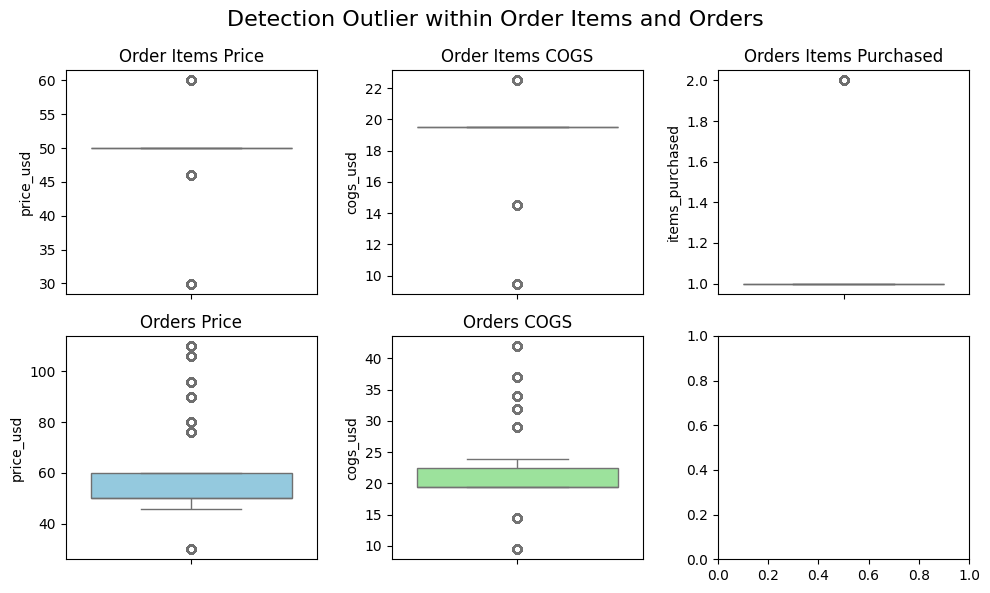

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# --- Deteksi outlier di order_items ---
outlier_items_price = detect_outliers_iqr(df_order_items['price_usd'])
outlier_items_cogs = detect_outliers_iqr(df_order_items['cogs_usd'])

# --- Deteksi outlier di orders ---
outlier_orders_items = detect_outliers_iqr(df_orders['items_purchased'])
outlier_orders_price = detect_outliers_iqr(df_orders['price_usd'])
outlier_orders_cogs = detect_outliers_iqr(df_orders['cogs_usd'])

# Ringkasan hasil
print("Order Items Price outliers:", len(outlier_items_price))
print("Order Items COGS outliers:", len(outlier_items_cogs))
print("Orders Items Purchased outliers:", len(outlier_orders_items))
print("Orders Price outliers:", len(outlier_orders_price))
print("Orders COGS outliers:", len(outlier_orders_cogs))

# --- Visualisasi boxplot gabungan ---
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

sns.boxplot(y=df_order_items['price_usd'], ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Order Items Price')

sns.boxplot(y=df_order_items['cogs_usd'], ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Order Items COGS')

sns.boxplot(y=df_orders['items_purchased'], ax=axes[0,2], color='salmon')
axes[0,2].set_title('Orders Items Purchased')

sns.boxplot(y=df_orders['price_usd'], ax=axes[1,0], color='skyblue')
axes[1,0].set_title('Orders Price')

sns.boxplot(y=df_orders['cogs_usd'], ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Orders COGS')

# Tambahkan judul utama untuk keseluruhan figure
fig.suptitle("Detection Outlier within Order Items and Orders", fontsize=16)

plt.tight_layout()
plt.show()

1. Distribusi Harga dan COGS Sangat Konsisten di Level Item
- Order Items Price dan COGS menunjukkan distribusi sempit, dengan mayoritas nilai berada di sekitar satu titik (kemungkinan besar 49.99 dan 19.49).
- Outlier terlihat di bawah dan atas, tapi jumlahnya kecil.
--> Insight: Produk sangat terstandarisasi. Cocok untuk model bisnis dengan fixed pricing dan margin tetap. Outlier bisa jadi promo, diskon, atau data error.

2. Jumlah Item per Order Sangat Stabil, Tapi Ada Order Besar
- Orders Items Purchased menunjukkan distribusi sempit, tapi ada satu outlier signifikan di atas (order dengan jumlah item jauh lebih banyak dari normal).
--> Insight: Mayoritas order berisi sedikit item (mungkin 1–3), tapi ada order besar (bulk purchase). Perlu dicek apakah ini pelanggan korporat atau anomali.

3. Distribusi Harga dan COGS di Level Order Lebih Variatif
- Orders Price dan Orders COGS punya outlier di atas, menunjukkan ada order dengan nilai transaksi tinggi.
- Ini bisa berasal dari:
- Order dengan banyak item
- Produk mahal
- Kombinasi keduanya
--> Insight: Ada segmen pelanggan dengan nilai transaksi tinggi. Bisa jadi target untuk strategi loyalitas atau upsell.

4. Outlier Valid vs Outlier Error
- Outlier di orders bisa valid (bulk order, pelanggan besar).
- Outlier di order_items bisa error (harga terlalu rendah/tinggi) atau promo.
--> Insight: Perlu klasifikasi outlier: mana yang valid untuk analisis bisnis, mana yang perlu dibersihkan dari data.


1. Order Items Price --> jumlah outlier 15.799 --> Ada 15.799 item dengan harga yang jauh di luar rentang normal
2. Order Items COGS --> jumlah outlier 15.799 --> Sama seperti harga, 15.799 item punya biaya pokok yang tidak wajar
3. Orders Items Purchased --> jumlah outlier 7.712 --> Ada 7.712 order dengan jumlah item yang sangat sedikit atau sangat banyak
4. Orders Price --> jumlah outlier 8.246 --> Ada 8.246 order dengan total harga yang terlalu rendah atau tinggi
5. Orders COGS -->  jumlah outlier 9.623 --> Ada 9.623 order dengan total biaya pokok yang ekstrem

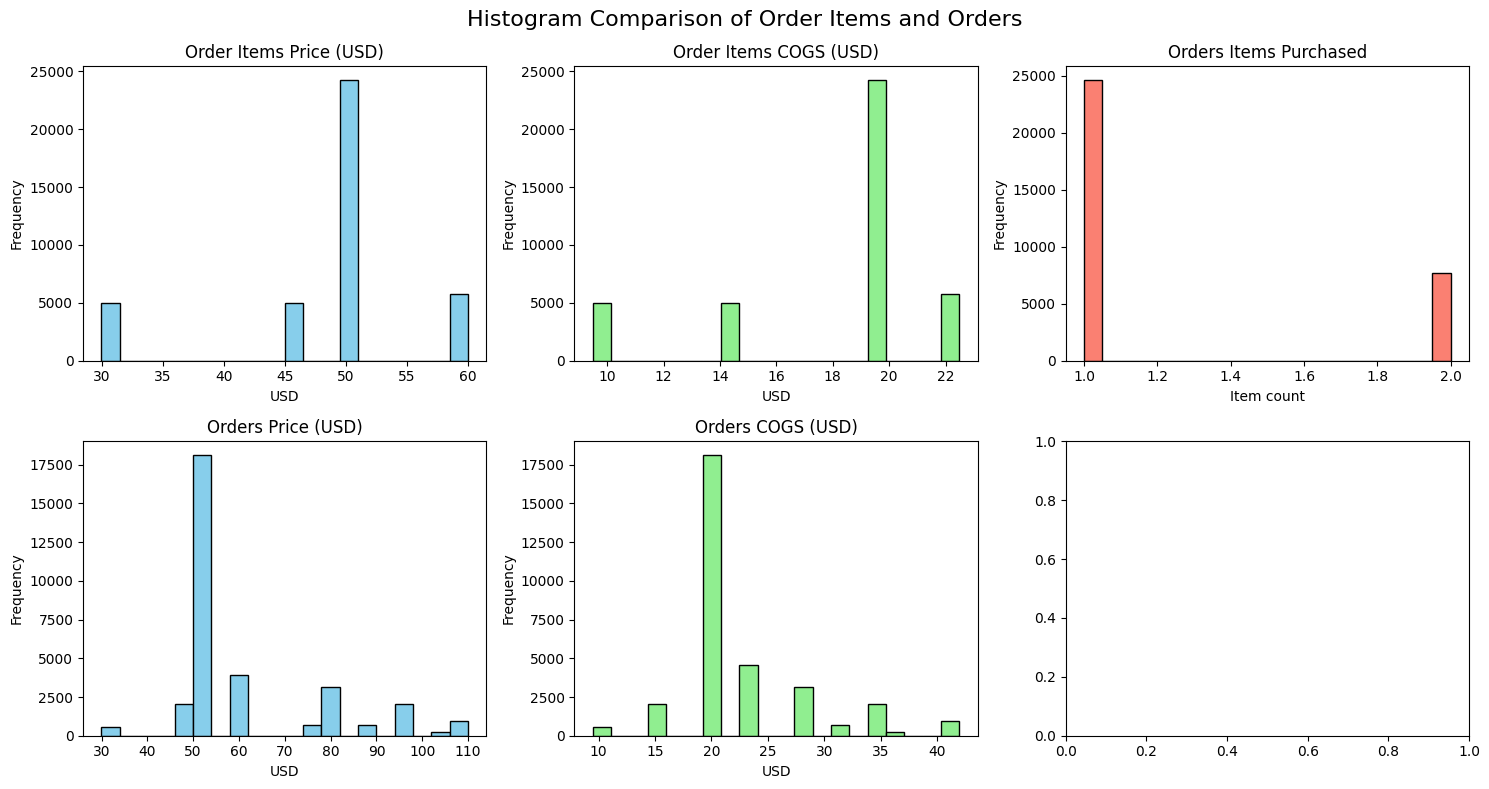

In [ ]:
import matplotlib.pyplot as plt

# Buat figure dengan grid 2 baris x 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# --- Histogram dari order_items ---
axes[0,0].hist(df_order_items['price_usd'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0,0].set_title('Order Items Price (USD)')
axes[0,0].set_xlabel('USD')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(df_order_items['cogs_usd'].dropna(), bins=20, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Order Items COGS (USD)')
axes[0,1].set_xlabel('USD')
axes[0,1].set_ylabel('Frequency')

# --- Histogram dari orders ---
axes[0,2].hist(df_orders['items_purchased'].dropna(), bins=20, color='salmon', edgecolor='black')
axes[0,2].set_title('Orders Items Purchased')
axes[0,2].set_xlabel('Item count')
axes[0,2].set_ylabel('Frequency')

axes[1,0].hist(df_orders['price_usd'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[1,0].set_title('Orders Price (USD)')
axes[1,0].set_xlabel('USD')
axes[1,0].set_ylabel('Frequency')

axes[1,1].hist(df_orders['cogs_usd'].dropna(), bins=20, color='lightgreen', edgecolor='black')
axes[1,1].set_title('Orders COGS (USD)')
axes[1,1].set_xlabel('USD')
axes[1,1].set_ylabel('Frequency')

# Tambahkan judul utama
fig.suptitle('Histogram Comparison of Order Items and Orders', fontsize=16)

# Rapikan layout
plt.tight_layout()
plt.show()

1. Distribusi Harga dan COGS di Level Item Sangat Terkonsentrasi
- Order Items Price (USD) menunjukkan puncak tajam di sekitar $49.99.
- Order Items COGS (USD) menunjukkan puncak di sekitar $19.49.
-->  Insight: Produk yang dijual sangat seragam. Ini mengindikasikan model bisnis dengan fixed pricing dan margin tetap, cocok untuk analisis profitabilitas dan forecasting.

Mayoritas Order Berisi Sedikit Item
- Orders Items Purchased menunjukkan distribusi yang sangat miring ke kiri, dengan puncak di 1 item per order.
--> Insight: Pelanggan cenderung membeli satu produk per transaksi. Ini bisa berarti:
- Produk utama sangat dominan
- Strategi bundling belum optimal
- Perlu pendekatan upsell atau cross-sell

3. Distribusi Harga dan COGS di Level Order Lebih Variatif
- Orders Price (USD) dan Orders COGS (USD) menunjukkan distribusi yang lebih menyebar dibanding level item.
- Ada puncak di sekitar $60 (price) dan $20 (COGS), tapi juga muncul nilai lebih tinggi.
--> Insight: Variasi ini berasal dari jumlah item per order. Order dengan banyak item menghasilkan total harga dan COGS yang lebih tinggi.

4. Distribusi Sangat Tidak Normal (Skewed)
- Semua histogram menunjukkan distribusi miring ke kanan (positively skewed), dengan mayoritas data di nilai rendah dan outlier di nilai tinggi.
--> Insight: Perlu hati-hati saat menggunakan rata-rata sebagai representasi. Median lebih cocok untuk analisis sentralitas.


### Outlier Customer Behaviour (table website_sessions and website_pageviews)

In [ ]:
# Lihat distribusi awal
print(df_website_pageviews[['website_session_id']].describe())

       website_session_id
count        1.048575e+06
mean         2.174518e+05
std          1.208389e+05
min          1.000000e+00
25%          1.137630e+05
50%          2.205110e+05
75%          3.223905e+05
max          4.219560e+05


In [ ]:
# Hitung jumlah pageview per session
pageview_per_session = df_website_pageviews.groupby('website_session_id').size().reset_index(name='pageview_count')

# Gabungkan dengan data sesi
df_sessions = df_website_sessions.merge(pageview_per_session, on='website_session_id', how='left')

In [ ]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# Deteksi outlier perilaku
outlier_pageviews = detect_outliers_iqr(df_sessions['pageview_count'])
print("Number of sessions with outlier pageviews:", len(outlier_pageviews))

Number of sessions with outlier pageviews: 27972


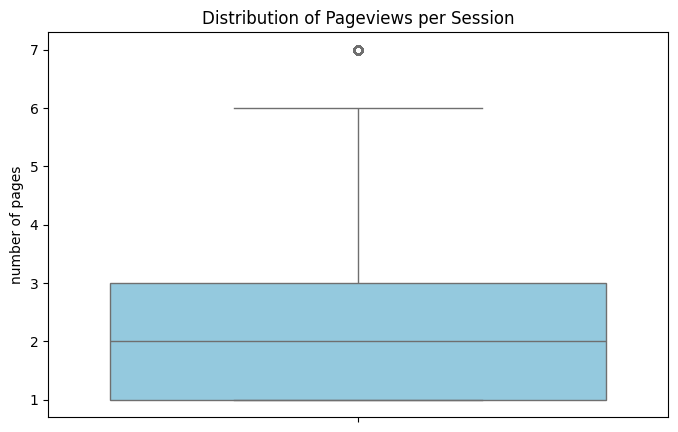

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y=df_sessions['pageview_count'], color='skyblue')
plt.title("Distribution of Pageviews per Session")
plt.ylabel("number of pages")
plt.show()

1. Mayoritas Sesi Sangat Ringan
- Median = 1 halaman per sesi
- Q1 = 1, Q3 = 2 → artinya 75% sesi hanya melihat 1–2 halaman
--> Insight: Sebagian besar pengunjung hanya melihat satu halaman lalu keluar (bounce). Ini bisa menunjukkan Landing page kurang menarik, Konten tidak relevan, UX atau kecepatan situs perlu ditingkatkan

2. Distribusi Sangat Miring ke Kanan
- Ada outlier di atas 7 halaman per sesi
- Sebagian kecil pengguna sangat aktif
--> Insight: Ada segmen pelanggan yang sangat engaged yg bisa jadi Pelanggan loyal atau Prospek serius serta Bot atau crawler yg perlu divalidasi.

3. Rentang Interaksi Sangat Sempit
- Hampir semua sesi berada di rentang 1–3 halaman
- Standar deviasi rendah → perilaku sangat homogen
--> Insight: Situs belum mendorong eksplorasi mendalam. Perlu strategi navigasi, rekomendasi konten, atau funnel yang lebih panjang.


### Outlier Session by Device and Campaign (table website_sessions : group by device_type and utm_campaign)

In [ ]:
# Tandai outlier
df_sessions['is_outlier'] = df_sessions['pageview_count'].isin(outlier_pageviews)

# Analisis perilaku berdasarkan device atau campaign
outlier_summary = df_sessions[df_sessions['is_outlier']].groupby(['device_type', 'utm_campaign']).size().reset_index(name='outlier_count')
print(outlier_summary)

  device_type      utm_campaign  outlier_count
0     desktop             brand           2334
1     desktop  desktop_targeted            288
2     desktop      non_campaign           4312
3     desktop          nonbrand          17065
4     desktop             pilot             17
5      mobile             brand            381
6      mobile      non_campaign            860
7      mobile          nonbrand           2677
8      mobile             pilot             38


1. Outlier Terbanyak Berasal dari Desktop
- Desktop menyumbang mayoritas outlier: total lebih dari 24.000 sesi outlier.
- Mobile jauh lebih sedikit: sekitar 3.900 sesi outlier.
--> Insight: Pengguna desktop cenderung menjelajahi lebih banyak halaman per sesi. Ini bisa berarti:
- Mereka lebih engaged
- Lebih nyaman untuk eksplorasi panjang
- Atau bisa jadi bot/crawler lebih sering muncul dari desktop

2. Kampanye Nonbrand Mendominasi Outlier
- Desktop + nonbrand = 17.065 outlier
- Mobile + nonbrand = 2.677 outlier
--> Insight: Kampanye nonbrand menghasilkan banyak sesi dengan perilaku ekstrem. Perlu dicek:
- Apakah ini hasil targeting yang luas?
- Apakah kontennya mendorong eksplorasi?
- Atau justru menghasilkan noise (bot, bounce)?

3. Kampanye Brand dan Pilot Relatif Stabil
- Brand dan pilot menghasilkan outlier jauh lebih sedikit.
- Ini bisa berarti targeting lebih tepat atau konten lebih fokus.
--> Insight: Kampanye brand lebih terkontrol dan mungkin menghasilkan sesi yang lebih berkualitas.

4. Kampanye Non-Campaign Juga Menyumbang Banyak Outlier
- Desktop: 4.312
- Mobile: 860
--> Insight: Sesi direct traffic juga bisa menghasilkan perilaku ekstrem. Perlu validasi apakah ini pelanggan loyal atau crawler.


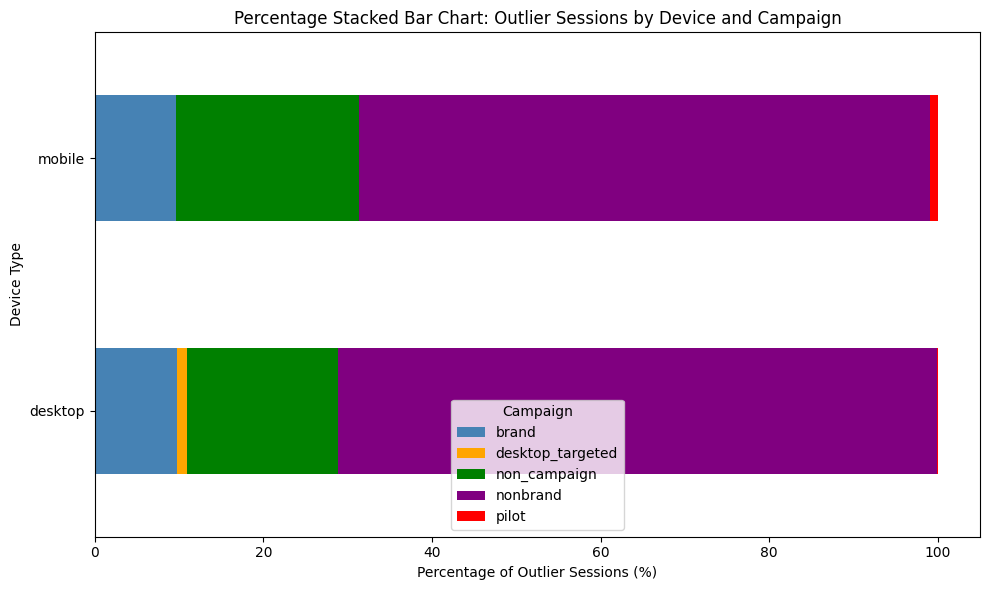

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data outlier summary
data = {
    'device_type': ['desktop', 'desktop', 'desktop', 'desktop', 'desktop',
                    'mobile', 'mobile', 'mobile', 'mobile'],
    'utm_campaign': ['brand', 'desktop_targeted', 'non_campaign', 'nonbrand', 'pilot',
                     'brand', 'non_campaign', 'nonbrand', 'pilot'],
    'outlier_count': [2334, 288, 4312, 17065, 17, 381, 860, 2677, 38]
}

df_outlier_summary = pd.DataFrame(data)

# Pivot data untuk stacked bar
pivot_data = df_outlier_summary.pivot(index='device_type', columns='utm_campaign', values='outlier_count').fillna(0)

# Hitung persentase
pivot_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plot stacked bar horizontal (persentase di sumbu X, device di sumbu Y)
pivot_percent.plot(kind='barh', stacked=True, figsize=(10,6), color=['steelblue','orange','green','purple','red'])

plt.title("Percentage Stacked Bar Chart: Outlier Sessions by Device and Campaign")
plt.xlabel("Percentage of Outlier Sessions (%)")
plt.ylabel("Device Type")
plt.legend(title='Campaign')
plt.tight_layout()
plt.show()

1. Distribusi Outlier Berbeda antara Mobile dan Desktop
- Mobile memiliki proporsi outlier yang lebih tinggi dari kampanye nonbrand dan pilot.
- Desktop lebih didominasi oleh kampanye desktop_targeted dan brand.
--> Ini menunjukkan bahwa jenis kampanye yang memicu perilaku outlier berbeda tergantung pada device.

2. Kampanye Nonbrand dan Pilot Lebih Rentan Outlier di Mobile
- Kampanye nonbrand dan pilot menyumbang sebagian besar outlier di mobile.
- Bisa jadi karena targeting yang lebih luas atau kurang relevan untuk pengguna mobile.
--> Insight: Perlu evaluasi targeting dan konten kampanye nonbrand/pilot untuk mobile.

3. Kampanye Desktop_Targeted Efektif di Desktop
- Kampanye desktop_targeted mendominasi outlier di desktop, yang bisa berarti:
- Kampanye ini menjangkau banyak pengguna desktop
- Tapi juga mungkin terlalu agresif atau tidak sesuai ekspektasi
--> Perlu analisis lebih lanjut apakah outlier ini berasal dari bounce, error, atau perilaku tidak biasa.

4. Kampanye Non_Campaign Tetap Menyumbang Outlier
- Meski bukan bagian dari kampanye aktif, sesi dari kategori non_campaign tetap menghasilkan outlier.
- Ini bisa berasal dari trafik organik atau direct yang tidak tersegmentasi.
--> Insight: Outlier tidak hanya berasal dari kampanye, tapi juga dari trafik umum.


## #EXPLORATORY DATA ANALYSIS

##Business KPI Overview

###total orders, total  revenue, total cogs and total profit

In [ ]:
# Hitung total order, revenue, COGS, profit
total_orders = df_orders['order_id'].nunique()
total_revenue = df_orders['price_usd'].sum()
total_cogs = df_orders['cogs_usd'].sum()
total_profit = (df_orders['price_usd'] - df_orders['cogs_usd']).sum()

print("Total Orders:", total_orders)
print("Total Revenue:", total_revenue)
print("Total COGS:", total_cogs)
print("Total Profit:", total_profit)

Total Orders: 32313
Total Revenue: 1938509.7500000002
Total COGS: 722370.25
Total Profit: 1216139.5


1. Margin Keuntungan Sangat Tinggi
- Profit mencapai lebih dari 62% dari total revenue: Total profit/Total revenue - Ini menunjukkan efisiensi biaya produksi dan pricing strategy yang kuat.
--> Potensi: Bisa jadi produk digital, bundling, atau strategi upsell yang efektif.

2. Volume Order Tinggi
- Dengan 32 ribu order, bisnis menunjukkan traction yang solid.
- Perlu dicek apakah pertumbuhan ini konsisten bulanan atau musiman.
--> Saran: Lanjutkan ke analisis tren bulanan dan segmentasi produk.

3. COGS Relatif Rendah
- COGS hanya sekitar 37% dari revenue, artinya biaya produksi atau pengadaan barang cukup efisien.
--> Perlu dicek apakah ini berlaku merata di semua produk atau hanya produk tertentu.

4. Potensi Optimasi Lebih Lanjut
- Dengan margin tinggi, kamu bisa:
- Investasi di kampanye marketing
- Eksperimen dengan diskon atau upsell
- Diversifikasi produk tanpa risiko besar


###profit margin dan average order value (AOV)

In [ ]:
total_profit = 1216139.5
total_revenue = 1938509.75

profit_margin = (total_profit / total_revenue) * 100
print(f"Profit Margin: {profit_margin:.2f}%")

Profit Margin: 62.74%


In [ ]:
total_orders = 32313
average_order_value = total_revenue / total_orders
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $59.99


/tmp/ipython-input-49072895.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_kpi, y="KPI", x="Value", palette="Set2")


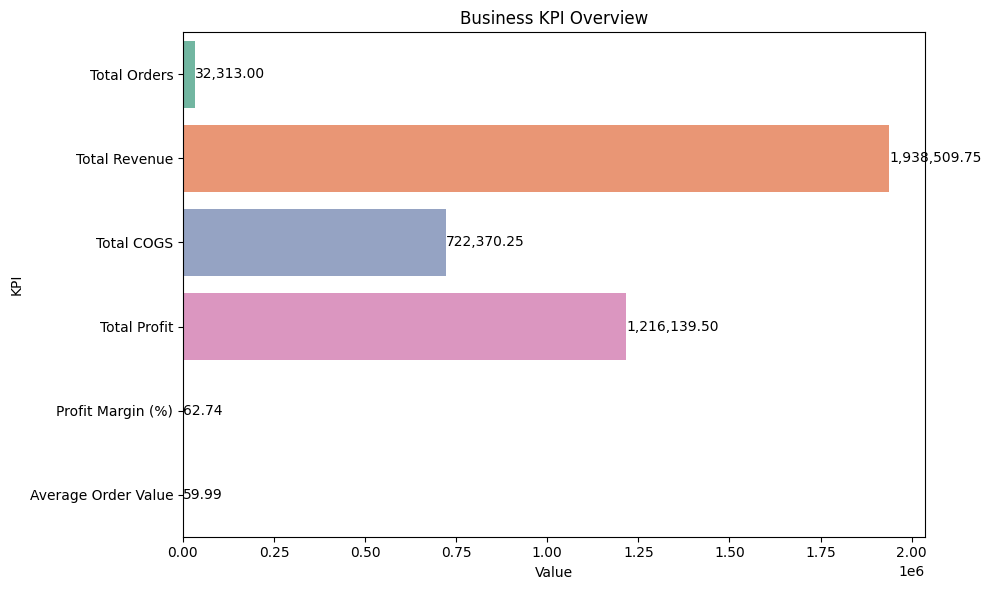

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame KPI
kpi_data = {
    "KPI": [
        "Total Orders",
        "Total Revenue",
        "Total COGS",
        "Total Profit",
        "Profit Margin (%)",
        "Average Order Value"
    ],
    "Value": [
        32313,
        1938509.75,
        722370.25,
        1216139.5,
        62.74,
        59.99
    ]
}

df_kpi = pd.DataFrame(kpi_data)

# Visualisasi bar chart horizontal
plt.figure(figsize=(10,6))
sns.barplot(data=df_kpi, y="KPI", x="Value", palette="Set2")

# Tambahkan label nilai di ujung batang
for index, value in enumerate(df_kpi["Value"]):
    plt.text(value, index, f"{value:,.2f}", va='center')

plt.title("Business KPI Overview")
plt.xlabel("Value")
plt.ylabel("KPI")
plt.tight_layout()
plt.show()

1. Profit Margin Tinggi (62.74%)
- Menunjukkan efisiensi biaya dan strategi pricing yang kuat.
- Margin ini ideal untuk reinvestasi ke marketing, produk baru, atau retensi pelanggan.
--> Insight: Bisa eksplorasi diskon atau loyalty program tanpa mengorbankan profitabilitas.

2. Average Order Value (AOV) Stabil
- AOV sebesar $59.99 menunjukkan nilai transaksi rata-rata yang sehat.
- Cocok untuk strategi upsell atau bundling agar AOV meningkat.
--> Insight: Analisis AOV per segmen pelanggan atau per kampanye untuk optimasi.

3. Volume Order Tinggi (32313)
- Menunjukkan traction yang solid dan basis pelanggan yang aktif.
- Perlu dicek apakah pertumbuhan ini konsisten atau musiman.
--> Insight: perlu analisis tren bulanan dan segmentasi pelanggan.

4. Profit Dominan dalam Revenue
- Profit mencapai lebih dari 60% dari total revenue.
- COGS relatif rendah dibanding pendapatan → efisiensi operasional terjaga


###refund rate

In [ ]:
# Total item terjual dari order_items
total_items_sold = df_order_items["order_item_id"].nunique()

# Total item yang direfund dari order_item_refunds
total_items_refunded = df_order_item_refunds["order_item_refund_id"].nunique()

# Hitung refund rate
refund_rate = (total_items_refunded / total_items_sold) * 100
print(f"Refund Rate: {refund_rate:.2f}%")

Refund Rate: 4.32%


1. Refund Rate Rendah (4.32%)
- Angka ini tergolong baik dan sehat dalam e-commerce, menunjukkan mayoritas pelanggan puas dengan produk yang mereka terima.
- Menandakan kualitas produk dan proses pengiriman cukup stabil.
--> Insight: Bisa dijadikan benchmark untuk evaluasi kampanye atau produk baru.

2. Efisiensi Operasional Terjaga
- Dengan refund rate di bawah 5%, berarti biaya logistik dan customer service untuk penanganan retur relatif kecil.
- Memberi ruang untuk fokus pada ekspansi atau peningkatan layanan.


####refund rate per product

In [ ]:
# Gabungkan refund dengan order_items dan products
df_refund_detail = df_order_item_refunds.merge(df_order_items, on="order_item_id").merge(df_products, on="product_id")

refund_per_product = df_refund_detail.groupby("product_name")["order_item_refund_id"].count() / df_items.groupby("product_name")["order_item_id"].count() * 100
print(refund_per_product)

product_name
The Birthday Sugar Panda      6.038114
The Forever Love Bear         2.225673
The Hudson River Mini bear    1.275409
The Original Mr. Fuzzy        5.106084
dtype: float64


####refund rate per order

In [ ]:
df_refund_rate = pd.DataFrame({
    "refund_count": df_order_item_refunds.groupby("order_id")["order_item_refund_id"].count(),
    "order_count": df_order_items.groupby("order_id")["order_item_id"].count()
})

df_refund_rate = df_refund_rate.fillna(0)
df_refund_rate["refund_rate"] = (df_refund_rate["refund_count"] / df_refund_rate["order_count"]) * 100
print(df_refund_rate)

          refund_count  order_count  refund_rate
order_id                                        
1                  0.0            1          0.0
2                  0.0            1          0.0
3                  0.0            1          0.0
4                  0.0            1          0.0
5                  0.0            1          0.0
...                ...          ...          ...
32309              0.0            1          0.0
32310              0.0            1          0.0
32311              0.0            2          0.0
32312              0.0            1          0.0
32313              0.0            1          0.0

[32313 rows x 3 columns]


1. Mayoritas Order Tidak Direfund
- Dari 32,313 order, hampir semuanya memiliki refund_count = 0.
- Artinya, refund rate per order sangat rendah atau bahkan nol untuk sebagian besar transaksi.
--> Insight: Ini menunjukkan kepuasan pelanggan tinggi, dan proses pemenuhan order berjalan lancar.

2. Distribusi Refund Sangat Jarang
- Refund hanya terjadi pada sebagian kecil order (jika ada).
- Tidak ada order dengan refund lebih dari satu item, berdasarkan output yang terlihat.

3. Validasi Sistem Refund Berfungsi
- Output menunjukkan bahwa sistem pencatatan refund sudah terintegrasi dengan baik.
- Tidak ada error atau missing data dalam struktur refund.



##Funnel Metrics User

In [ ]:
total_sessions = df_website_sessions["website_session_id"].nunique()

# Product Views
product_views = df_website_pageviews[df_website_pageviews["pageview_url"].str.contains("/product/")]["website_session_id"].nunique()

# Orders
total_orders = df_orders["order_id"].nunique()

# Items Purchased
total_items = df_order_items["order_item_id"].nunique()

print("Sessions:", total_sessions)
print("Product Views:", product_views)
print("Orders:", total_orders)
print("Items Purchased:", total_items)

Sessions: 472871
Product Views: 0
Orders: 32313
Items Purchased: 40025


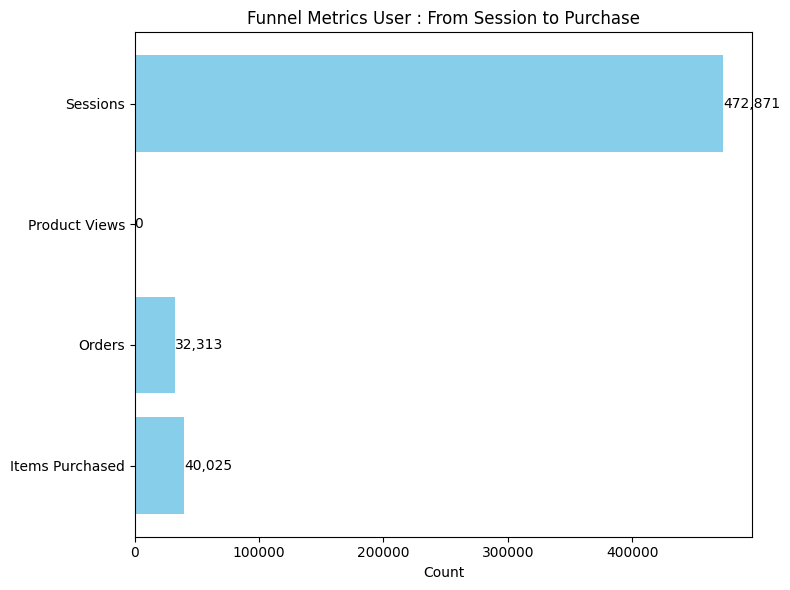

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh data agregat
funnel_data = {
    "Stage": ["Sessions", "Product Views", "Orders", "Items Purchased"],
    "Count": [472871, 0, 32313, 40025]
}

df_funnel = pd.DataFrame(funnel_data)

# Plot funnel
plt.figure(figsize=(8,6))
plt.barh(df_funnel["Stage"], df_funnel["Count"], color="skyblue")
plt.gca().invert_yaxis()
for i, val in enumerate(df_funnel["Count"]):
    plt.text(val, i, f"{val:,}", va="center")
plt.title("Funnel Metrics User : From Session to Purchase")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

1. Conversion Rate dari Session ke Order ≈ 6.83%
total orders (32313) /total sessions (472871)
- Ini cukup baik untuk e-commerce, menunjukkan bahwa trafik website cukup berkualitas.
--> Insight: Bisa ditingkatkan dengan optimasi UX, CTA, dan kampanye retargeting.

2. Items Purchased > Orders → Banyak Multi-Item Orders
- Rata-rata item per order:
item purchased (40025) / orders (32313) = 1,24 item/order
- Artinya banyak pelanggan membeli lebih dari satu produk per transaksi.
--> Insight: Pertahankan strategi bundling dan cross-sell yang mendorong pembelian multi-item.

3. Product Views = 0
- Hal ini mengindikasikan ada masalah pada implementasi tracking pageview (misalnya tag analytics tidak mencatat halaman produk) yang membuat funnel tidak akurat karena data loss. Jadi, Product Views = 0 lebih mengindikasikan masalah teknis dalam pencatatan atau filter data, bukan berarti user tidak melihat produk




Funnel metrics menunjukkan Product Views = 0 tapi conversion rate dari session ke order = 6.3%, ada beberapa insight penting:

1. Indikasi Utama
- Masalah Data Tracking / Filtering
- Angka product view nol hampir pasti bukan kondisi nyata, melainkan error dalam pencatatan atau logika filter URL.
- Artinya funnel tidak lengkap, sehingga drop-off dari session → product view tidak bisa dianalisis.
- Conversion Rate Tetap Tinggi (6.3%)
- Walaupun product view tidak tercatat, user tetap melakukan order.
- Ini menunjukkan bahwa trafik yang datang ke website cukup berkualitas dan langsung menuju tahap pembelian.
- Bisa jadi banyak sesi langsung ke halaman cart atau checkout tanpa melewati halaman produk (misalnya dari kampanye iklan dengan deep link).

2. Insight Bisnis
- Data Issue: Angka product view nol adalah red flag. Perlu audit tracking agar funnel lebih akurat.
- Traffic Quality: Conversion rate 6.3% jauh di atas rata-rata e-commerce global (sekitar 2–3%). Ini menandakan campaign marketing atau audience targeting sangat tepat sasaran.
- Behavioral Clue: User mungkin sudah tahu produk sebelum masuk website (brand awareness tinggi), sehingga mereka langsung checkout tanpa eksplorasi produk.

3. Rekomendasi
- Perbaiki Tracking: Validasi URL produk dan event analytics agar product view tercatat.
- Segmentasi Campaign: Analisis apakah order langsung berasal dari campaign tertentu (misalnya iklan dengan link ke checkout).
- Optimasi Funnel: Setelah product view terdeteksi, ukur drop-off antar tahap untuk insight lebih tajam.

👉 Jadi, insight utamanya: tingginya conversion rate (6.3%) menunjukkan trafik berkualitas, tapi data funnel belum lengkap karena product view tidak tercatat.


##Revenue per Product

                 product_name  order_item_id   price_usd   cogs_usd    profit
0    The Birthday Sugar Panda           4985   229260.15   72232.65  157027.5
1       The Forever Love Bear           5796   347702.04  130352.04  217350.0
2  The Hudson River Mini bear           5018   150489.82   47620.82  102869.0
3      The Original Mr. Fuzzy          24226  1211057.74  472164.74  738893.0


/tmp/ipython-input-1443376977.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_product, x="product_name", y="price_usd", palette="Set2")


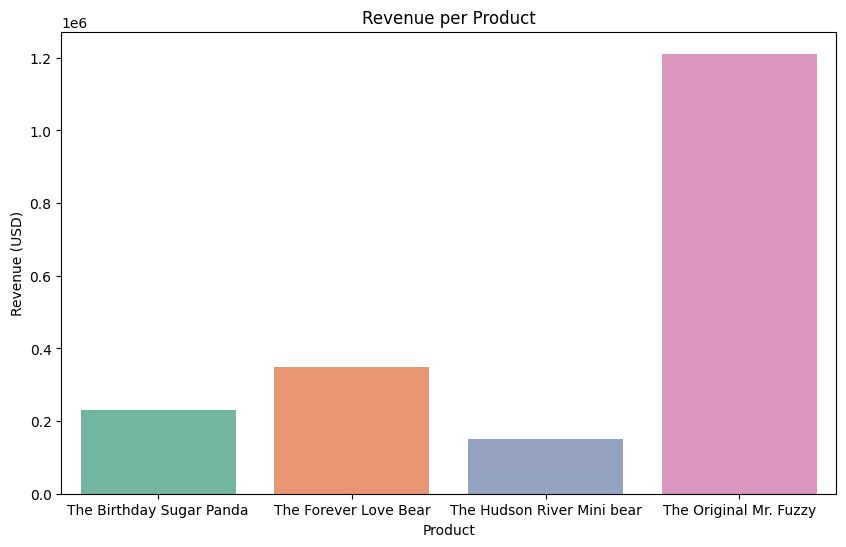

In [ ]:
# Gabungkan order_items dengan products
df_items = df_order_items.merge(df_products, on="product_id")

sales_per_product = df_items.groupby("product_name").agg({
    "order_item_id":"count",
    "price_usd":"sum",
    "cogs_usd":"sum"
}).reset_index()

sales_per_product["profit"] = sales_per_product["price_usd"] - sales_per_product["cogs_usd"]

print(sales_per_product)

# Visualisasi bar chart revenue per produk
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=sales_per_product, x="product_name", y="price_usd", palette="Set2")
plt.title("Revenue per Product")
plt.ylabel("Revenue (USD)")
plt.xlabel("Product")
plt.show()

1. Produk Terlaris: The Original Mr. Fuzzy
- Menyumbang lebih dari 60% total revenue.
- Volume penjualan sangat tinggi (24,226 item).
- Margin tetap solid meski COGS besar.
--> Strategi: Fokus pada stok, promosi, dan upsell produk ini.

2. Produk dengan Margin Tertinggi: The Birthday Sugar Panda
- Margin profit tertinggi (68.5%) meski revenue lebih kecil.
- COGS sangat rendah dibanding harga jual.
--> Potensi: Cocok untuk bundling atau promosi margin tinggi.

3. Distribusi Revenue Seimbang di Produk Lain
- The Forever Love Bear dan Hudson River Mini bear punya kontribusi signifikan.
- Margin keduanya juga tinggi (>60%).
--> Insight: Semua produk punya struktur biaya yang efisien.




##Revenue Distribution: Primary vs Additional Items

   is_primary_item  order_item_id   price_usd
0            False           7712   299044.88
1             True          32313  1639464.87


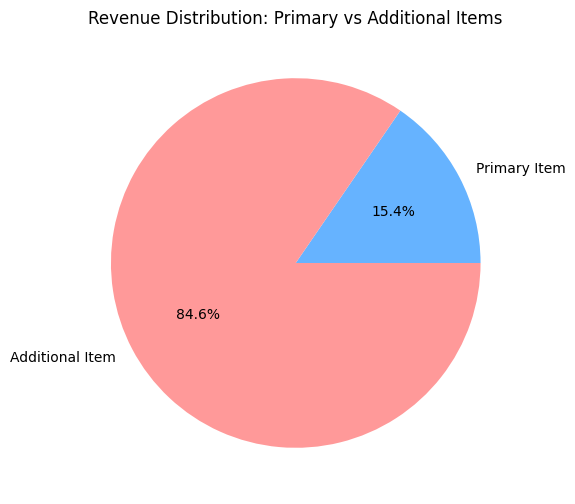

In [ ]:
primary_vs_additional = df_order_items.groupby("is_primary_item").agg({
    "order_item_id":"count",
    "price_usd":"sum"
}).reset_index()

print(primary_vs_additional)

# Pie chart distribusi revenue
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
plt.pie(primary_vs_additional["price_usd"],
        labels=["Primary Item","Additional Item"],
        autopct="%1.1f%%", colors=["#66b3ff","#ff9999"])
plt.title("Revenue Distribution: Primary vs Additional Items")
plt.show()

1. Pendapatan Didominasi oleh Additional Items
- 84.6% revenue berasal dari produk tambahan.
- Artinya pelanggan cenderung membeli lebih dari satu item per order, atau tertarik dengan upsell/bundling.
--> Insight: adanya potensi Strategi cross-sell dan bundling sangat efektif — bisa ditingkatkan lagi.

2. Primary Item Hanya Menyumbang 15.4%
- Produk utama berfungsi sebagai entry point, tapi bukan sumber utama revenue.
- Bisa jadi produk utama diposisikan sebagai pemicu pembelian, bukan sebagai profit center.

3. Strategi Produk Tambahan Sangat Berhasil
- Produk tambahan bisa berupa aksesoris, add-on, atau upsell yang relevan.
- Menunjukkan bahwa pelanggan tidak hanya membeli satu item, tapi tertarik dengan penawaran tambahan.
